In [ ]:
import mne, os
from signal_processing.pre_process import *
from basic.arrange_data import read_files

**Set the folder of EEG files**

Run the cell to be prompted with an input box for choosing the folder containing the EEG files of interest.

*NB! The path has to be in 'Data\Raw\' folder relative to this notebook.*

In [ ]:
exp_folder = r"Eyes Closed\T1" # in case you want to just type the dir here
#exp_folder = input('Experiment folder (e.g., Eyes Open\Baseline):')

raw_folder = r"HBA_data\Raw"
clean_folder = r"HBA_data\Clean"
dir_inprogress = os.path.join(raw_folder,exp_folder)
export_dir = os.path.join(clean_folder,exp_folder)

file_dirs, subject_names = read_files(dir_inprogress,".bdf")

**Pre-process raw EEG files and save them**

1. Read raw BDF file, set EOG channels, and montage type
2. Filter data with FIR bandpass filter and remove EOG noise
3. Segment data into epochs and conduct artefact rejection and augmentation
4. Attempt to create a folder and save the cleaned signal file in FIF format (only successful if the path is empty!)

Extracting EDF parameters from c:\Users\TANIJARV\Downloads\Ketamine-SI project\eeg-pipeline\Data\Raw\Eyes Closed\Baseline\OKTOS_0001_00A_EC.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 268287  =      0.000 ...   261.999 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
3 events found
Event IDs: [1 2 8]


array([[ 15674,      0,      1],
       [ 15776,      0,      8],
       [261447,      0,      2]], dtype=int64)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6759 samples (6.601 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth

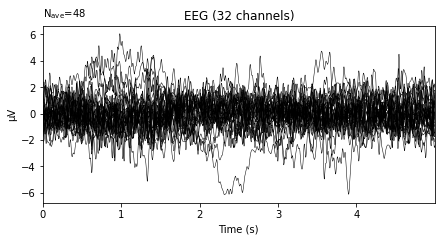

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


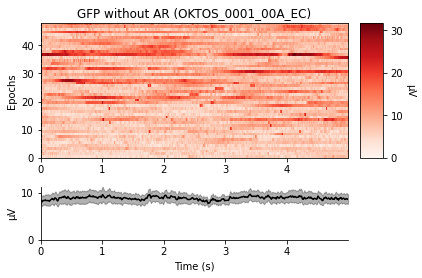

Estimating rejection dictionary for eeg
Dropping epochs with rejection threshold: {'eeg': 0.00025086881305629743}
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=31


  0%|          | Repairing epochs : 0/48 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


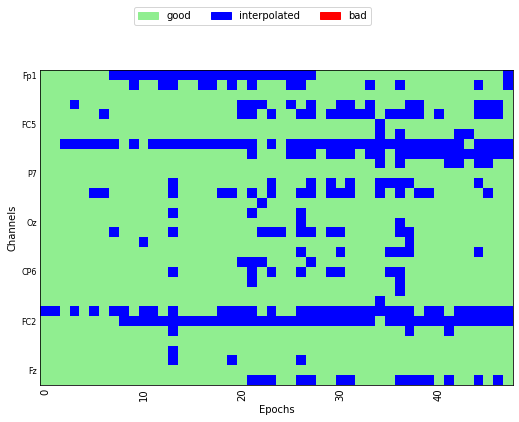

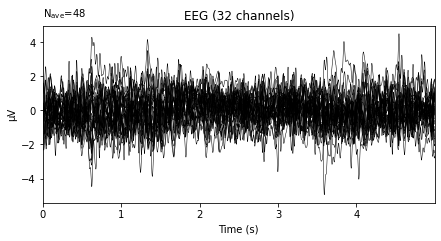

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


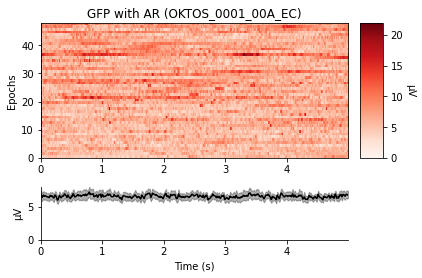

Using matplotlib as 2D backend.
Opening epochs-browser...


Closing epochs-browser...
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [4]:
for i in range(len(file_dirs)):  
    raw = mne.io.read_raw_bdf(file_dirs[i],infer_types=True,
                              eog=["EXG1","EXG2","EXG3","EXG4","EXG5","EXG6","EXG7","EXG8"],
                              stim_channel="Status")#.drop_channels(["Erg1",
                            #   "B1","B2","B3","B4","B5","B6","B7","B8","B9","B10","B11","B12",
                            #   "B13","B14","B15","B16","B17","B18","B19","B20","B21","B22","B23","B24",
                            #   "B25","B26","B27","B28","B29","B30","B31","B32",
                            #   "C1","C2","C3-1","C4-1","C5","C6","C7","C8","C9","C10","C11","C12",
                            #   "C13","C14","C15","C16","C17","C18","C19","C20","C21","C22","C23","C24",
                            #   "C25","C26","C27","C28","C29","C30","C31","C32",
                            #   "D1","D2","D3","D4","D5","D6","D7","D8","D9","D10","D11","D12",
                            #   "D13","D14","D15","D16","D17","D18","D19","D20","D21","D22","D23","D24",
                            #   "D25","D26","D27","D28","D29","D30","D31","D32"]).rename_channels({'C3-0':'C3','C4-0':'C4'})

    raw = raw.set_montage(mne.channels.make_standard_montage("biosemi32")).load_data()\
             .set_eeg_reference(ref_channels='average')

    # Find stimulus points, i.e. start and end of resting state, and crop the signal
    events = mne.find_events(raw,stim_channel='Status',consecutive=True,output='offset')
    display(events)

    cropped_raw = raw.crop(tmin=events[0][0]/raw.info['sfreq'],tmax=events[-1][0]/raw.info['sfreq'])
    
    # Filter the signal with bandpass filter and remove EOG artefacts with SSP
    filt = filter_raw_data(cropped_raw,l_freq=0.5,h_freq=30,eog_remove=True)

    %matplotlib inline
    epochs = artefact_rejection(filt,subject_names[i],epo_duration=5)

    # For displaying interactive EEG plots
    %matplotlib qt
    epochs.plot(n_channels=32,n_epochs=1)

    try:
        os.makedirs(export_dir)
    except FileExistsError:
        pass
    try:
        mne.Epochs.save(epochs,fname='{}\{}_clean-epo.fif'.format(export_dir,subject_names[i]))
    except FileExistsError:
        pass